# **Homework 3: Implementation of a classifier perceptron for binary classification - From Scratch**
### Universidad de Monterrey


**Nombre:** Leslie Fabiola López Rosales - 571315

**Programa académico:** Ingeniería en Tecnologías Computacionales

**Profesor:** Dr. Andrés Hernández Gutiérez

**Materia:** Inteligencia Artificial 2


**Lugar y fecha:** *Monterrey, Nuevo León a 19 de septiembre del 2024*

Antes de iniciar, primero se debe de importar todas las librerías que se necesitarán para poder trabajar:
- **ucimlrepo:** Es el repositorio en GitHub del UC Irvine Machine Learning Repository. Ahí se encuentra el método *fetch_ucirepo()* que sirve para cargar el dataset del UCI ML Repository.

- **pandas:** Es una librería de Python open source para la ingeniería y análisis de datos. Sirve también para transformar los datos en Dataframes.

- **matplotlib.pyplot:** Esta librería usa la capa de scripting pyplot para graficar los datos. Por ejemplo, explorar los datos y graficar el modelo para poder visualizar si tiene buen ajuste.

- **numpy:** Es una librería de Python que sirve para trabajar con arreglos y operaciones matemáticas (W3S, 2024).

- **tensorflow:** Sirve para generar y entrenar modelos de machine learning (TensorFlow, 2024). Para este caso, se usa para diseñar, entrenar y validar una neurona.

- **sklearn.model_selection:** Esta librería funciona para hacer selección en el conjunto de datos, como hacer validación cruzada. Para este caso, sólo se usa el método train_test_split que sirve para hacer la división de los datos de entrenamiento y los datos de pueba (Scikit-learn, 2024).

- **sklearn.preprocessing:** Es un paquete de Sklearn que transforma los datos. Sirve generalmente para estandarizar el dataset como una distribución normal. Se utiliza la clase *StandardScaler* para estandarizar el dataset aplicando la fórmula $x=\frac{X - mediaX}{std}$ para que los datos de X se transformen y tengan una media de casi 0 y una desviación estándar aproximada de 1 y evitar sesgos en las características (Scikit-learn, 2024).

- **ConfusionMatrixDisplay:** Es una clase de la librería sklearn.metrics que sirve para poder graficar y visualizar una matriz de confusión.

- **confusion_matrix:** Es una función de la librería sklearn.metrics que sirve para calcular la matriz de confusión del modelo para poder evaluar la exactitud del mismo. (Scikit-learn, 2024).

**NOTA:** Se usa el comando "as" para renombrar la librería y no tener que escribir todo el nombre al momento de usar algún método. Por ejemplo, en lugar de escribir matplotlib.pyplot.plot(), se escribe plt.plot().

In [1]:
#Se instala el paquete del repositorio de la UC Irvine Machine Learning Repository. El pip es el packet manager de Python.
!pip install ucimlrepo

#Se importan las librerías necesarias. La explicación detallada de cada librería y método están en la text cell de arriba
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

Se cargan los datos del repositorio en UC Irvine Machine Learning Repository y lo se guardan en *occupancy_detection*. Esta variable guarda todo el objeto, pero sólo se necesitan los datos, por lo que se extraen sólo el dataset con *.data.original* y lo se guardan en la variable *data*. Además, se imprime cada variable para observar la diferencia de lo que se guarda en cada una. Como resultado, se tiene listo el dataset para poder trabajar con los datos.

In [2]:
#Se carga el dataset Occupancy Detection del UC Irvine Machine Learning Repository, que tiene de ID=357
occupancy_detection = fetch_ucirepo(id=357)

#Se imprime para ver el objeto que tiene metadatos además del dataset
print(occupancy_detection)

#Para visualizar mejor la separación
print("------------------------------------------------------")

#Se construye el dataset con las características (features) y la variable objetivo (target)
data = occupancy_detection.data.original

#Se imprime sólo el dataset
print(data)

{'data': {'ids':          id
0         1
1         2
2         3
3         4
4         5
...     ...
20557  9748
20558  9749
20559  9750
20560  9751
20561  9752

[20562 rows x 1 columns], 'features':                       date Temperature Humidity   Light      CO2  \
0      2015-02-04 17:51:00       23.18   27.272     426   721.25   
1      2015-02-04 17:51:59       23.15  27.2675   429.5      714   
2      2015-02-04 17:53:00       23.15   27.245     426    713.5   
3      2015-02-04 17:54:00       23.15     27.2     426   708.25   
4      2015-02-04 17:55:00        23.1     27.2     426    704.5   
...                    ...         ...      ...     ...      ...   
20557  2015-02-18 09:15:00      20.815  27.7175  429.75  1505.25   
20558  2015-02-18 09:16:00      20.865   27.745   423.5   1514.5   
20559  2015-02-18 09:16:59       20.89   27.745   423.5   1521.5   
20560  2015-02-18 09:17:59       20.89  28.0225  418.75     1632   
20561  2015-02-18 09:19:00          21     28.1     

Una vez teniendo los datos brutos, se realiza una limpieza de datos para
eliminar aquellas características que no son relevantes para el modelo, convertir los datos a que sean de tipo numérico y también se eliminan aquellas observaciones que les falten datos. Al final, se tiene como resultado el dataset limpio y listo. Se guarda en la variable *df*.

In [3]:
#Se eliminan las columnas "date" y "id" de data y se guarda el resultado en df
df = data.drop(['date', 'id'], axis=1)

#Para cada columna se transforma para que sea tipo dato numérico. Si es inválido, el dato se convierte en NaN
df[df.columns] = df[df.columns].apply(pd.to_numeric, errors='coerce')

#Se eliminan las muestras que contengan datos faltantes o que no sean numéricos (NaN)
df = df.dropna()

Para observar el dataset limpio, se despliega el contenido de *df* en la consola y se verifica que está listo para trabajarse. En este caso, sólo  interesan las features de "Temperature", "Humidity", "Light", "CO2" y "HumidityRatio" para poder predecir si el espacio está ocupado o no ("Occupancy").

In [4]:
#Se imprime el contenido de df
df

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.180,27.2720,426.00,721.25,0.004793,1.0
1,23.150,27.2675,429.50,714.00,0.004783,1.0
2,23.150,27.2450,426.00,713.50,0.004779,1.0
3,23.150,27.2000,426.00,708.25,0.004772,1.0
4,23.100,27.2000,426.00,704.50,0.004757,1.0
...,...,...,...,...,...,...
20557,20.815,27.7175,429.75,1505.25,0.004213,1.0
20558,20.865,27.7450,423.50,1514.50,0.004230,1.0
20559,20.890,27.7450,423.50,1521.50,0.004237,1.0
20560,20.890,28.0225,418.75,1632.00,0.004279,1.0


Después, se imprimen algunas estadísticas descriptivas para cada característica y también para el traget con el método *describe()*. Como las variables son de tipo numérica, la función calcula las siguientes estadísticas: cuántos datos son (count), la media (mean), la desviación estándar (std), el valor mínimo (min), el cuartil 1 (25%), la mediana (50%), el cuartil 3 (75%) y el valor máximo (max) para cada una de las variables.

In [5]:
#Se calculan las estadísticas descriptivas de cada variable del dataset y se imprimen en consola
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


Para asegurar la reproducibilidad del modelo, se agrega una semilla para que el generador de números aleatorio de Tensorflow sea de 4500, con el fin de que las operaciones aleatorias produzcan los mismos resultados. Así, es posible poder comparar modelos, evaluar y permitir que otros repliquen el modelo y tengan los mismos resultados. Si no se añade la semilla, el modelo sigue funcionando pero puede tener algunas ligeras diferencias en los resultados porque se utilizaron otros números aleatorios en las operaciones aleatorias y puede dificultar la evaluación o replicación del modelo.

In [6]:
#Se asigna una semilla de reproducibilidad a 4500
tf.random.set_seed(4500)

Se crean las variables X y Y:
+ X tendrá todas las características del dataset, menos la columna "Occupancy". Es decir, los datos de las columnas "Temperature", "Humidity", "Light", "CO2" y "HumidityRatio".
+ Y tendrá los datos de la columna "Occupancy". Esta es la variable target.

In [7]:
#Se asigna a X los datos de la variable df sin la columna "Occupancy".
X = df.drop(["Occupancy"], axis=1)

#Se asigna a Y sólo los datos de la columna "Occupancy" de df
y = df['Occupancy']

Ahora si, es momento de trabajar con los datos para posteriormente generar el modelo. Para empezar, se tiene que separar nuestro conjunto de datos en dos: aquellos datos que se usarán para el entrenamiento y los que se usarán solamente de prueba para evaluar la calidad del modelo.
- Así que, se crean las variables *X_train* y *y_train* que tendrán el 80% de los datos correspondientes a las variables originales X y Y y se usarán para el entrenamiento del modelo.
- Se crean también las variables *X_test* y *y_test* y tendrán el 20% restante de los datos de X y Y respectivamente para usarlos solamente para evaluar el modelo. Estos datos de prueba prácticamente serán nuevos para el modelo.

Para hacer la separación, se usa el método *train_test_split()* que recibe como parámetros el conjunto de datos X, el conjunto de datos para Y, la proporción del tamaño para los datos de prueba, una semilla aleatoria para que la división de datos sea la misma para la reproducibilidad del modelo. Se especifica también que mezcle los datos un poco más antes de separarlos.


In [8]:
#Se separa el conjunto de datos en entrenamiento y prueba con un ratio de 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

Posteriormente, se estandarizan los datos de X para que no existan sesgos en dar más importancia a una característica por su diferencia de rango de valores. Para ello, se crea un objeto de la clase StandardScaler para poder usar el metodo *fit_transform()*. Primero, se ajusta el escalador a los datos de entrenamiento o prueba y luego transforma los datos utilizando los factores de escala calculados.

Como resultado, se obtienen los datos de entrenamiento y de prueba en X estandarizados que siguen o se aproximan a una distribución normal con media de 0 y distribución estándar de 1 aproximadamente.

In [9]:
#Se crea un objeto de la clase StandardScaler y se guarda en scaler
scaler = StandardScaler()

#Se transforman los datos de entrenamiento X_train para que se estandaricen
X_train = scaler.fit_transform(X_train)

#Se transforman los datos de prueba X_test para que se estandaricen
X_test = scaler.transform(X_test)

A continuación, se define la clase del modelo del perceptrón desde 0. Esta clase tiene atributos y métodos que permiten la creación y entrenamiento del modelo aplicando el gradiente descendiente para ir optimizando los pesos de w y b. También se definen funciones para predecir valores de Y (si es que la oficina está opcuapa o no), para evaluar el modelo y calcular los costos entre cada iteración del entrenamiento. Como resultado, se obtiene una clase que simula el funcionamiento de un perceptrón capaz de entrenar un modelo. Para saber cómo funciona explícitamente cada método de la clase, se encuentran las explicaciones detalladas como comentarios en cada línea de código.

In [10]:
#Se importa el método expit de la librería scipy.special, que sirve para hacer la función sigmoide
from scipy.special import expit

#Se crea la clase que simula una neurona (o perceptron)
class NeuronModel():

    #Se define el método constructor que tiene como parámetros la matríz de características X, los valores de las etiquetas Y,
    #la tasa de aprendizaje con la que va a estar aprendiendo el modelo y el criterio para parar las repeticiones
    #de entrenamiento del modelo. En este caso, hasta que el error sea igual o menor a 0.001 deja de entrenar por default.
    def __init__(self, X, y, learning_rate=0.01, error_threshold=0.001) -> None:

        #Asegurar que la variable X no esté vacía
        assert X.size != 0, "X cannot be empty"

        #Asegurar que la variable Y no esté vacía
        assert y.size != 0, "y cannot be empty"

        #Asegurar que la tasa de aprendizaje sea positiva para que se pueda aplicar bien el gradiente descendiente
        assert learning_rate > 0, "learning rate must be positive"

        #Asegurar que X sea de tipo numpy porque están más optimizadas
        if not isinstance(X, np.ndarray):
            #Si no lo es, se convierte
            X = X.to_numpy()

        #Asegurar que Y sea de tipo numpy porque están más optimizadas
        if not isinstance(y, np.ndarray):
            #Si no lo es, se convierte. Además, se reajustan las dimensiones del array para que sea 2D de tamaño (n,1).
            #Esto se hace para no tener problemas de compatibilidad, ya que en ML se trabaja con matríces y arreglos 2D, y la
            #variable Y generalmente sólo es de 1 columna, por lo que hay que redimensionarse.
            y = y.to_numpy().reshape(-1,1)

        #Se guarda X en el atributo mismo de la clase
        self.X = X

        #Se guarda Y en el atributo mismo de la clase
        self.y = y

        #Se guarda la tasa de aprendizaje en el atributo mismo de la clase
        self.learning_rate = learning_rate

        #Se inicializa el valor inicial de los pesos con 0s, dependiendo del número de columnas que tiene la matriz de X.
        #X.shape[1] da el número de columnas, y el tamaño resultante es de (n_columnas,1)
        self.w = np.zeros((X.shape[1], 1))

        #Se inicializa el parámetro del bias igual a 0
        self.b = np.zeros((1, 1))

        #Se inicializa el número de muestras. X.shape[0] da el número de filas de la matriz X, mientras que X.shape[1] da el número de columnas
        self.N = X.shape[0]

        #Se inicializa como una lista vacía para ir guardando los costos de cada iteración. En teoría, cada costo debería de ir decrementando
        #con cada iteración porque el modelo va aprendiendo
        self.J_iter = list()

        #Se guarda el criterio de paro en el atributo mismo de la clase
        self.stopping_tolerance = error_threshold

    #Se define la función logística que recibe como parámetros los pesos w, el bias b y las características X
    def compute_logistic(self, w, b, X):

        #Se usa el método expit() que realiza la función sigmoide 1/(1+e^-wTx) para hacer la estimación a
        return expit(X@w + b)

    #Se define la función compute_cost que calcula el costo de cada iteración con base a las predicciones Y, los valores reales de Y,
    # y el número de muestras
    def compute_cost(self, y_hat, y, N):

        #Se calcula el loss al sumar los productos de Y*log(predicciónY) + (1-Y)*log(1-pedicciónY)
        L = y*np.log(y_hat) + (1-y)*np.log(1-y_hat)

        #Se calcula el costo al realizar el promedio de todos los losses.
        J = -L.sum() / N

        #Se regresa el costo
        return J

    #Se define la función de propagación hacia adelante que recibe como parámetros los pesos w, el bias b y las características X
    def forward_propagation(self, w, b, X):

        #Se calcula la función logística con compute_logistic() que se implementó en la misma clase
        #y se guarda en a, que es la predicción Y.
        a = self.compute_logistic(w, b, X)

        #Se regresa el valor de Y estimado
        return a

    #Se define la función de propagación hacia atrás que recibe como parámetros las predicciones de Y, las etiquetas reales, los pesos w,
    #y las características X
    def backward_propagation(self, y_hat, y, w, X):

        #Se define la variable N con el tamaño de muestras
        N = X.shape[0]

        #Se calcula el gradiente de w al sacar el promedio de las multiplicaciones entre las restas de las predicciones con su etiqueta real
        #(el error) y la matriz de X
        gradient_w = np.multiply(y_hat - y, X).sum(axis=0)/ N

        #Se redimensiona el gradiente w para que tenga los mismos renglones que los pesos w
        gradient_w = gradient_w.reshape(w.shape)

        #Se calcula el gradiente b al sacar el promedio de las restas entre las predicciones con su etiqueta real (el error)
        gradient_b = (y_hat - y).sum() / N

        #Se redimensiona el gradiente b para que sea compatible y tenga un tamaño de 2D con una columna
        gradient_b = gradient_b.reshape(-1,1)

        #Se regresan los valores de los gradientes para cada peso w y b
        return gradient_w, gradient_b

    #Se define la función para actualizar los parámetros de w o b con base al parámetro que se va a actualizar y el gradiente que obtuvo
    def update_parameters(self, param, gradient):

        #Se resta al valor de w o b actual el producto entre la tasa de aprendizaje y el gradiente respectivo.
        #Es decir, w = w - alpha*gradienteJw(X) o b = b - alpha*gradienteJw(b)
        return np.subtract(param, np.multiply(self.learning_rate, gradient))

    #Se define la función train para entrenar el modelo. Recibe como parámetro verbose que significa si se va a imprimir el detalle
    #de entrenamiento de cada iteración o no
    def train(self, verbose=0):

        #Primero se realiza la propagación hacia adelante con la función forward_propagation() que se implementó en la misma clase
        #y se guarda el resultado de las predicciones en la variable y_hat. Para calcular la predicción, se manda como parámetros
        #los pesos W, el bias b, y el valor de entrada X.
        y_hat = self.forward_propagation(self.w, self.b, self.X)

        #Se calcula el costo inicial de la iteración usando la función compute_cost() que se implementó en la misma clase
        #y se guarda en J_prev. Para hacer el costo, se manda de parámetros las predicciones hechas, las etiquetas reales y el tamaño
        #de muestras
        J_prev = self.compute_cost(y_hat, self.y, self.N)

        #Se inicializan el costo global en 0 y el error porcentual actual en 100
        J, current_percentage_error = 0, 100

        #Se recuperan los valores de los pesos y el bias, pues son los que se estarán actualizando en el gradiente descendiente
        w, b = self.w, self.b


        # --- INICIO IMPLEMENTACIÓN GRADIENTE DESCENDIENTE ---

        #Mientras el error porcentual actual (costo) sea mayor al criterio de paro, se sigue aplicando el gradiente descendiente
        #para que el modelo siga aprendiendo y vaya optimizando los parámetros de w y b hasta que su costo sea menor o igual al criterio de paro,
        #a 0.0001 para este caso.
        while current_percentage_error > self.stopping_tolerance:

            #Se actualiza el costo anterior para que sea el costo global (o costo actual)
            J_prev = J

            #e realizan las estimaciones de Y con la función de propagación hacia adelante y se actualizan las nuevas predicciones
            y_hat = self.forward_propagation(w, b, self.X)

            #Se calculan los gradiente de w y de b usando la propagación hacia atrás con la función backward_propagation que se implementó
            #en la misma clase y recibe de parámetros las Y estimadas, los valores reales de Y, los pesos actuales y las características X
            gradient_w, gradient_b = self.backward_propagation(y_hat, self.y, w, self.X)

            #Utilizando el gradiente de w y el valor actual de w, se actualizan el peso w con la función update_parameters() que se implementó en
            #la misma clase
            w = self.update_parameters(w, gradient_w)

            #Utilizando el gradiente de b y el valor actual de b, se actualiza el bias b con la función update_parameters() que se implementó en
            #la misma clase
            b = self.update_parameters(b, gradient_b)

            #Se vuelve a calcular las estimaciones para Y con la propagación hacia adelante
            y_hat = self.forward_propagation(w, b, self.X)

            #Se actualiza el costo global (o el actual) con esta iteración usando la función compute_cost
            J = self.compute_cost(y_hat, self.y, self.N)

            #Se agrega el nuevo costo a la lista de J_iter
            self.J_iter.append(J)

            #Se calcula el error porcentual actual con base al costo de la iteración anterior y con el costo actual
            current_percentage_error = np.abs((J - J_prev)/J)*100

            #Si verbose=1, se imprime en consola los detalles de cada iteración del entrenamiento
            if verbose:
                #Se imprime el costo anterior, el costo actual y el error porcentual a 7 digitos y 6 cifras decimales de cada iteración
                print(f"J_previous: {J_prev:8.6f} \t"
                      f"J_current: {J:8.6f} \t"
                      f"Error: {current_percentage_error:8.6f}")

        # --- FIN IMPLEMENTACIÓN GRADIENTE DESCENDIENTE ---


        #Se guardan los pesos finales de w
        self.w = w

        #Se gurada el peso final de b
        self.b = b

    #Se define la función para hacer las predicciones usando los datos de entrada X.
    def predict(self, X):

        #Se utiliza la propagación hacia adelante con los coeficientes entrenados de w y b, y los valores X como input
        a = self.forward_propagation(self.w, self.b, X)

        #Se regresa la predicción
        return a

    #Se define la función para graficar la función de costo
    def plot_cost_function(self):

        #Se grafica usando los valores de la lista de costos J_iter
        plt.plot(self.J_iter)

        #Se añade la leyenda para el eje X que represesnta la iteración
        plt.xlabel('Iteration')

        #Se añade la leyenda para el eje Y que represesnta el costo
        plt.ylabel(r"$J_{\mathbf{w}}$")

    #Se define la función para evaluar la exactitud del modelo usando las predicciones y los valores reales para Y
    def evaluate(self, y_hat, y):

        #Se verifica que Y sea de tipo numpy
        if not isinstance(y, np.ndarray):

            #Si no lo es, se transforma y se redimensiona para que no haya problemas de compatibilidad
            y = y.to_numpy().reshape(-1,1)

        #Si la estimación de probabilidad es mayor o igual a 0.5, se predice que la oficina está ocupada
        y_hat[y_hat >= 0.5] = 1

        #Si la estimación de probabilidad es menor a 0.5, se predice que la oficina no está ocupada
        y_hat[y_hat < 0.5] = 0

        #Se calcula cuántas predicciones fueron erróneas. Si la resta absoluta entre el valor real y su predicción es 0, significa que la
        #predicción fue correcta. De lo contrario, no. Si no es correcta, se guarda el índice solamente en la variable err.
        err = np.where((np.abs(y - y_hat) > 0) == True)[0]

        #Se calcula la exactitud al restar la tasa de error (número de errores/número de predicciones) de 1 para obtener la proporción de
        #predicciones correctas
        return 1-err.shape[0]/y.shape[0]

    #Se define la función para obtener los parámetros calculados para cada característica
    def get_parameters(self):

        #Agrupa en una pila los pesos de w y el bias b
        return np.vstack((self.w, self.b))


Ahora sí, se crea y entrena el modelo utilizando la clase creada desde cero NeuronModel definida en el bloque de código anterior y se guarda en la variable *model*. Una vez creada la instancia, se usa la función creada *train()* para entrenar el modelo usando la lógica que se explicó en el código anterior. Como resultado, se obtiene el modelo (o el perceptrón) entrenado con los datos de entrenamiento.

In [11]:
#Se inicializa el modelo llamando a la función constructora de la clase NeuronModel definida anteriormente, dando los parámetros
#requeridos. Se mandan los datos de entrenamiento para X y Y, la tasa de aprendizaje de 0.01 y un criterio de paro de 0.001.
model = NeuronModel(X=X_train, y=y_train, learning_rate=0.01, error_threshold=0.001)

#Se entrena el modelo con el método train implementado en la clase NeuronModel. Se especifica para que despliegue el detalle de cada
#iteración del entrenamiento
model.train(verbose=1)

Se han truncado las últimas 5000 líneas del flujo de salida.
J_previous: 0.066025 	J_current: 0.066023 	Error: 0.002286
J_previous: 0.066023 	J_current: 0.066022 	Error: 0.002285
J_previous: 0.066022 	J_current: 0.066020 	Error: 0.002285
J_previous: 0.066020 	J_current: 0.066019 	Error: 0.002284
J_previous: 0.066019 	J_current: 0.066017 	Error: 0.002284
J_previous: 0.066017 	J_current: 0.066016 	Error: 0.002284
J_previous: 0.066016 	J_current: 0.066014 	Error: 0.002283
J_previous: 0.066014 	J_current: 0.066013 	Error: 0.002283
J_previous: 0.066013 	J_current: 0.066011 	Error: 0.002282
J_previous: 0.066011 	J_current: 0.066010 	Error: 0.002282
J_previous: 0.066010 	J_current: 0.066008 	Error: 0.002281
J_previous: 0.066008 	J_current: 0.066007 	Error: 0.002281
J_previous: 0.066007 	J_current: 0.066005 	Error: 0.002280
J_previous: 0.066005 	J_current: 0.066004 	Error: 0.002280
J_previous: 0.066004 	J_current: 0.066002 	Error: 0.002280
J_previous: 0.066002 	J_current: 0.066001 	Error: 0.00

Para poder visualizar cómo va aprendiendo el modelo con cada iteración, se grafica la función de costo para observar cómo es que el error porcentual va disminuyendo. Esto llega hasta que la diferencia entre el costo de la iteración anterior y el costo de la iteración actual sea menor o igual a 0.01 para este caso, que fue el valor de criterio de paro que se asignó al entrenar el modelo. Como resultado, se obtiene una gráfica con una curva suave que va disminuyendo muy rápido en las primeras iteraciónes pero se va estabilizando o aplanando ya en las últimas iteraciones, ya que cada vez va mejorando en sus predicciones y el error por ende va disminuyendo. Esto significa que convergió correctamente. Finalmente, se puede ver también que el modelo llegó más de 14,000 iteraciones antes de llegar a su criterio de paro.

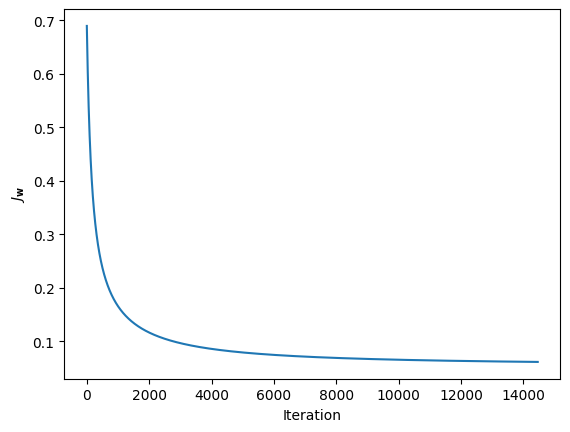

In [12]:
#Se grafica la función de costo del modelo usando el método definido en la clase NeuronModel
model.plot_cost_function()

Después, se realizan las predicciones usando el modelo entrenado con la función *predict()* implementado en la clase NeuronModel. Se hacen las predicciones para los datos de prueba para X.

In [13]:
#Se realizan las predicciones para Y usando el método predict() y como input los datos de prueba X_test
y_predictions = model.predict(X=X_test)

Se obtienen los parámetros usando la función *get_parameters()* implementada en la clase NeuronModel para poder ver lo coeficientes que calculó al final y aprendió el modelo para cada característica, al igual que el parámetro de bias. Como resultado, se tiene un arreglo numérico 2D de tamaño n_columnas + 1, que representa el número de características + el bias (o B0).

In [14]:
#Se imprimen los coeficientes que fueron calculados con el modelo usando la función get_parameters()
model.get_parameters()

array([[-0.44810384],
       [ 0.16249795],
       [ 3.58693399],
       [ 0.77499297],
       [ 0.14333135],
       [-3.00728971]])

Una vez teniendo el modelo entrenado con los datos, se evalúa la exactitud del modelo con el método evaluate() implementado en la clase NeuronModel. Como parámetros se requieren las predicciones realizadas para los datos de prueba y las etiquetas reales de los datos de prueba. Al final, el resultado es la exactitud del modelo, que respresenta la proporción de predicciones correctas que tiene. En este caso, tiene una exactitud de aproximadamente 0.989, lo cual es un buen indicador de que el modelo predice bien. Sin embargo, es necesario tomar en cuenta otras métricas de desempeño para evaluar profundamente el modelo.

In [15]:
#Se evalúa el modelo utilizando las predicciones y_predictions y sus valores reales y_test
model.evaluate(y_hat=y_predictions, y=y_test)

0.9888132295719845

## Performance Metrics

Para facilitar el cálculo de las métricas de desempeño del modelo, es necesario calcular 4 valores importantes:

+ **True Positive (TP):** Representan aquellas predicciones positivas (1) que son correctas

+ **True Negative (TN):** Representan aquellas predicciones negativas (0) que son correctas

+ **False Positive (FP):** Representan aquellas predicciones positivas que son incorrectas

+ **False Negative (FN):** Representan aquellas predicciones negativas que son incorrectas

Estos valores son fácilmente calculados haciendo una matriz de confusión. Por ello, se realiza una usando la función *confusion_matrix()* de la librería Sklearn.metrics. Además, para tener una mejor visualización de los valores, se grafica una matríz usando la clase *ConfusionMatrixDisplay()*. Esto da como resultado una gráfica con una matriz de 4 cuadrantes que demuestra cuántas predicciones se encuentran en cada cuadrante, con base a a la Etiqueta Real y Predicción de la Etiqueta. Es decir, si la predicción coincide con el valor real o no.

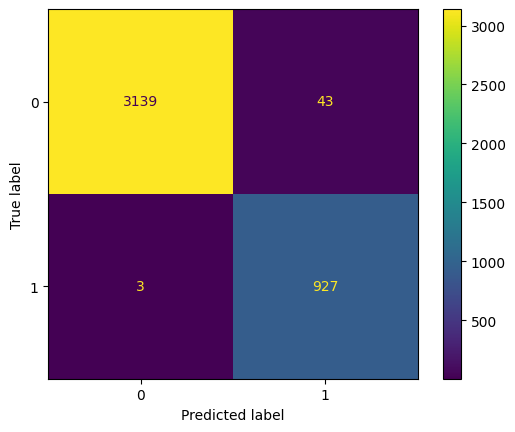

In [16]:
#Se calcula la matriz de confusión utilizando las predicciones de Y y los valores reales de Y
c_matrix = confusion_matrix(y_true=y_test, y_pred=y_predictions)

#Se grafica la matriz de confusión usando la clase ConfusionMatrixDisplay()
display_matrix = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
display_matrix.plot()

Por último, se calculan las métricas de desempeño del modelo, con el fin de poder evaluar el rendimiento y calidad del modelo, así como también comparar con otros modelos y escoger el mejor. Como resultado, se obtienen calculadas las métricas:
+ **Exactitud:** Mide la proporción de cuántas predicciones que fueron correctas / total de predicciones

+ **Precisión:** Mide la proporción de cuántas predicciones positivas que fueron correctas / total de predicciones positivas

+ **Sensibilidad:** Mide la proporción de cuántas predicciones positivas fueron correctas / total de valores que son realmente positivos

+ **Especificidad:** Mide la proporción de cuántas predicciones negativas fueron correctas / total de valores que son realmente negativos

+ **F1 Score:** Mide la media de proporciones de la precisión y la sensibilidad. Sirve especialmente cuando hay una distribución desbalanceada de las clases y son importantes estudiar los casos de los falsos positivos y los falsos negativos.

In [17]:
#Se define la función para calcular las 5 métricas de desempeño
def get_performance_metrics(c_matrix):
    #Se asignan los valores de True Negatives, False Positives, False Negatives y True Positives de la matríz de confusión previamente calculada
    tn, fp, fn, tp = c_matrix[0][0], c_matrix[0][1], c_matrix[1][0], c_matrix[1][1]

    #Se calcula la exactitud del modelo, haciendo una proporción de todas las predicciones correctas / total de predicciones
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    #Se calcula la precisión del modelo, que es la proporción de las predicciones positivas que fueron correctas
    precision = tp / (tp + fp)

    #Se calcula la sensibilidad del modelo, que es la proporción de casos positivos que fueron corectamente predichos
    recall = tp / (tp + fn)

    #Se calcula la especificidad del modelo, que es la proporción de casos negativos que fueron correctamente predichos
    specificity = tn / (tn + fp)

    #Se calcula el valor F1, que es el promedio de proporciones de la precisión y la sensibilidad
    f1_score = 2 * (precision * recall)/(precision + recall)

    #Se regresan las métricas
    return accuracy, precision, recall, specificity, f1_score

#Calculamos las métricas con la función previamente definida utilizando la matriz de confusión
accuracy, precision, recall, specificity, f1_score = get_performance_metrics(c_matrix)

#Se imprime cada una de las métricas de desempeño a 6 decimales
print(f"Accuracy: {accuracy:0.6f}")
print(f"Precision: {precision:0.6f}")
print(f"Recall: {recall:0.6f}")
print(f"Specificity: {specificity:0.6f}")
print(f"F1-score: {f1_score:0.6f}")


Accuracy: 0.988813
Precision: 0.955670
Recall: 0.996774
Specificity: 0.986486
F1-score: 0.975789


## Análisis y Discusión de las Métricas de Desempeño

+ En general, el modelo es bueno. Tiene una exactitud de 0.989 aproximadamente, lo que significa que el 98.9% de las veces el modelo predice correctamente. Esta métrica es sencilla de comprender y tener una idea de la calidad del modelo al momento de hacer predicciones. No obstante, es necesario considerar las otras métricas porque la pura exactitud no es suficiente para concluir si el modelo es de buena calidad o no, ya que existe el riesgo de sesgo del desbalance de clases con la que fue entrenado el modelo.

+ Tiene una precisión de 0.956 aproximadamente, lo que significa que el 95.6% de las veces está correcto en predecir que está ocupado cuando predice que está ocupado. Es ligeramente menor en comparación con la exactitud. Sin embargo, sigue siendo un buen número, puesto que es un valor alto cercano a 1. Para este caso, puede ser que sea importante que el modelo prediga correctamente que la oficina está ocupada a que cuando dice que no está ocupada, ya que es más importante o más útil saber con mayor precisión que la oficina esté ocupada que desocupada para que la persona pueda utilizarla.

+ Tiene una sensibilidad de 0.996 aproximadamente, muy cercano al 1; lo que significa que el 99.6% de las veces está correcto en predecir que la oficina está ocupada cuando realmente está ocupada. Es decir, falla muy poco en predecir que la oficina está ocupada cuando sí está ocupada. Para este caso, puede ser que sea muy importante que el modelo prediga correctamente que la oficina está ocupada a que cuando dice que  está desocupada, puesto que puede darse el caso que la persona ocupe una oficina para una junta importante y si el modelo tiene una sensibilidad baja, puede ocurrir el riesgo o problemas de que se empalmen las juntas o sí se encontraba ocupada después de todo; ya que el modelo no detectó correctamente todos los casos cuando la oficina se encontraba ocupada.

+ Tiene una especificidad de 0.986 aproximadamente, lo que significa que el 98.6% de las veces está correcto en predecir que la oficina está desocupada cuando realmente está desocupada. En general es un muy buen número, ya que su valor es muy alto y muy cercano a 1, por lo que la gran mayoría de las veces que detecta oficinas desocupadas está en lo correcto.

+ Tiene una F1 score de 0.976 aproximadamente, lo que significa que tiene un muy buen desempeño y que el modelo se encuentra bien balanceado dentro de lo que cabe. Este valor alto del F1 score también indica que el modelo tiene la capacidad de poder mantener una alta precisión y una alta sensibilidad. Para este caso es más importante que el modelo esté en lo correcto cuando predice que está ocupada la oficina y que no se le escape cuando realmente la oficina está ocupada, ya que las consecuencias de querer usar una oficina cuando está ocupada son "más graves" que las consecuencias de no usar una oficina cuando realmente estaba desocupada. En general, es un F1 score muy bueno y cercano al 1.

+ Cabe mencionar que estas métricas están calculadas con base a predicciones hechas en los datos de prueba, por lo que no representa mucho riesgo de overfitting. Esto se debe a que el modelo se desempeña con buenas métricas con datos que no ha visto, lo cual es muy bueno. En cambio, si las métricas se basaran con predicciones de los datos usados en entrenamiento, ahí hay un sesgo y no sería confiable concluir que el desempeño del modelo es muy bueno. Hasta incluso tendría mejores métricas que se tienen con los datos de prueba, debido al sesgo de que el modelo ya conoce los datos.

## **Referencias**

+ Scikit-learn. (2024). 6.3. Preprocessing data. Scikit-learn. Recuperado de https://scikit-learn.org/stable/modules/preprocessing.html
+ Scikit-learn. (2024). confusion_matrix. Scikit-learn. Recuperado de https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
+ Scikit-learn. (2024). sklearn.model_selection. Scikit-learn. Recuperado de https://scikit-learn.org/stable/api/sklearn.model_selection.html
+ TensorFlow. (2024). Introducción a TensorFlow. TensorFlow. Recuperado de https://www.tensorflow.org/learn?hl=es
+ W3S. (2024). NumPy Introduction. W3Schools. Recuperado de https://www.w3schools.com/python/numpy/numpy_intro.asp#:~:text=NumPy%20is%20a%20Python%20library,%2C%20fourier%20transform%2C%20and%20matrices.


**Firma de Honor:** "Yo, Leslie López, doy mi palabra de que he realizado esta tarea con integridad académica"